In [1]:
import pickle
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob, os
import torch
from torch.utils.data import Dataset
from skimage import io
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from pathlib import Path
import pickle
import time
import torch.optim as optim

In [2]:
!wget https://www.dropbox.com/s/nes12l1x7pehv46/train.tar.gz

--2020-11-10 07:02:59--  https://www.dropbox.com/s/nes12l1x7pehv46/train.tar.gz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.1, 2620:100:601c:1::a27d:601
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/nes12l1x7pehv46/train.tar.gz [following]
--2020-11-10 07:02:59--  https://www.dropbox.com/s/raw/nes12l1x7pehv46/train.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9056caa969e659e6ca3556cf1b.dl.dropboxusercontent.com/cd/0/inline/BC5W_679QHyOVCEeEyKq589rkUoZfNqXt9ADqabnAXhhVlsAo9XjF4zYNtCSZAVQqTX9rZWsLibXLRShrK45Ko6Kh9GedRyqILA7TSyby1YCTgUgrGPjwgFuXy9ZV_0hJzI/file# [following]
--2020-11-10 07:03:00--  https://uc9056caa969e659e6ca3556cf1b.dl.dropboxusercontent.com/cd/0/inline/BC5W_679QHyOVCEeEyKq589rkUoZfNqXt9ADqabnAXhhVlsAo9XjF4zYNtCSZAVQqTX9rZWsLibXLRShrK45Ko6Kh9GedRyqILA7TSyby1YCTgUgrG

In [3]:
!tar --gunzip --extract --verbose --file=train.tar.gz

Выходные данные были обрезаны до нескольких последних строк (5000).
./ANS31/snapshots/snapshots-2015-12-25/img-2015-12-25T07-56-43devID1.jpg
./ANS31/snapshots/snapshots-2015-12-25/img-2015-12-25T13-59-25devID1.jpg
./ANS31/snapshots/snapshots-2015-12-25/img-2015-12-25T07-55-13devID1.jpg
./ANS31/snapshots/snapshots-2015-12-25/img-2015-12-25T13-04-48devID1.jpg
./ANS31/snapshots/snapshots-2015-12-25/img-2015-12-25T07-03-06devID1.jpg
./ANS31/snapshots/snapshots-2015-12-25/img-2015-12-25T12-01-11devID2.jpg
./ANS31/snapshots/snapshots-2015-12-25/img-2015-12-25T03-59-45devID1.jpg
./ANS31/snapshots/snapshots-2015-12-25/img-2015-12-25T09-56-26devID1.jpg
./ANS31/snapshots/snapshots-2015-12-25/img-2015-12-25T12-03-41devID1.jpg
./ANS31/snapshots/snapshots-2015-12-25/img-2015-12-25T14-00-55devID2.jpg
./ANS31/snapshots/snapshots-2015-12-25/img-2015-12-25T12-03-11devID2.jpg
./ANS31/snapshots/snapshots-2015-12-25/img-2015-12-25T05-59-59devID2.jpg
./ANS31/snapshots/snapshots-2015-12-25/img-2015-12-25T10

In [4]:
!rm train.tar.gz

In [5]:
with open('/content/index.pkl', 'rb') as f:
    data_index = pickle.load(f)

In [ ]:
data_index

In [7]:
data = pd.DataFrame(data_index)
data.head()

,jpg_filename,lon,lat,mask_fname,mission,devID,observations_dt,observed_TCC
0,img-2019-12-11T10-02-37devID2.jpg,-10.783049,41.343315,AMK79/masks/mask-id2.png,AMK79,2,2019-12-11 10:00:00.000,4
1,img-2019-12-11T09-56-17devID2.jpg,-10.775720,41.359167,AMK79/masks/mask-id2.png,AMK79,2,2019-12-11 10:00:00.000,4
2,img-2019-12-11T10-04-17devID1.jpg,-10.784958,41.339135,AMK79/masks/mask-id1.png,AMK79,1,2019-12-11 10:00:00.000,4
3,img-2019-12-11T14-00-00devID2.jpg,-11.037792,40.761531,AMK79/masks/mask-id2.png,AMK79,2,2019-12-11 13:59:59.975,1
4,img-2019-12-11T12-58-20devID2.jpg,-10.973738,40.909492,AMK79/masks/mask-id2.png,AMK79,2,2019-12-11 12:59:59.980,1


In [8]:
data.describe()

,lon,lat,devID,observed_TCC
count,92077.000000,92077.000000,92077.000000,92077.000000
mean,12.884987,3.641005,1.499995,5.008927
std,47.924996,23.667443,0.500003,2.998372
min,-52.703152,-44.215189,1.000000,0.000000
25%,-28.843466,-12.876762,1.000000,2.000000
50%,-9.265234,1.899143,1.000000,6.000000
75%,64.609930,22.735270,2.000000,8.000000
max,99.668979,44.957148,2.000000,8.000000


In [9]:
len(data['observed_TCC'].unique())

9

In [10]:
data['mission'].unique()

array(['AMK79', 'ABP42', 'AI52', 'AI49', 'ANS31'], dtype=object)

In [11]:
os.mkdir('train')

In [12]:
for mis in data['mission'].unique():
    dirs = []
    roott = '/content/{}/snapshots/'.format(mis)
    for dir, folder, file in os.walk(roott) :
        dirs.append(dir)

    for dir in dirs:
        for path in Path('{}'.format(dir)).glob('*.jpg'):
          path.replace(Path('/content/train') / path.name)

In [13]:
!rm -rf "/content/ABP42"
!rm -rf "/content/AI49"
!rm -rf "/content/AI52"
!rm -rf "/content/AMK79"
!rm -rf "/content/ANS31"

In [ ]:
#folders = []
#files = []
#for mis in data['mission'].unique():
#    dirs = []
#    os.mkdir('train{}'.format(mis))
#
#    roott = '/content/{}/snapshots/'.format(mis)
#    for dir, folder, file in os.walk(roott):
#        dirs.append(dir)
#        #folders.append(folder)
#        #files.append(file)
#
#    for dir in dirs:
#        for path in Path('{}'.format(dir)).glob('*.jpg'):
#            path.replace(Path('/content/train{}'.format(mis)) / path.name)

In [14]:
print(len(glob.glob('/content/train/*')))
assert(len(glob.glob('/content/train/*')) == len(data))
print("OK!")

92077
OK!


In [ ]:
#print(len(glob.glob('/content/trainABP42/*')))
#print(len(glob.glob('/content/trainAI49/*')))
#print(len(glob.glob('/content/trainAI52/*')))
#print(len(glob.glob('/content/trainAMK79/*')))
##print(len(glob.glob('/content/trainANS31/*')))
#print(len(glob.glob('/content/trainABP42/*')) 
#                    + len(glob.glob('/content/trainAI49/*')) 
#                    + len(glob.glob('/content/trainAI52/*'))
#                    + len(glob.glob('/content/trainAMK79/*')) 
#                    + len(glob.glob('/content/trainANS31/*'))
#                    )
#assert(len(data) == ( len(glob.glob('/content/trainABP42/*')) 
#                    + len(glob.glob('/content/trainAI49/*')) 
#                    + len(glob.glob('/content/trainAI52/*'))
#                    + len(glob.glob('/content/trainAMK79/*')) 
#                    + len(glob.glob('/content/trainANS31/*'))
#                    )
#)
#print("OK!")

36015
160
27033
17474
11395
92077
OK!


In [15]:
split = np.random.rand(len(data)) < 0.8
train_data_set = data[split]
test_data_set = data[~split]

In [16]:
ABP42 = train_data_set[train_data_set['mission'] == 'ABP42']
AI49 = train_data_set[train_data_set['mission'] == 'AI49']
AI52 = train_data_set[train_data_set['mission'] == 'AI52']
AMK79 = train_data_set[train_data_set['mission'] == 'AMK79']
ANS31 = train_data_set[train_data_set['mission'] == 'ANS31']

In [17]:
ABP42_data_sets = ABP42[['jpg_filename', 'observed_TCC']]
AI49_data_sets  = AI49[['jpg_filename', 'observed_TCC']]
AI52_data_sets  = AI52[['jpg_filename', 'observed_TCC']]
AMK79_data_sets = AMK79[['jpg_filename', 'observed_TCC']]
ANS31_data_sets = ANS31[['jpg_filename', 'observed_TCC']]

In [18]:
print(ABP42_data_sets.shape)
print(AI49_data_sets.shape)
print(AI52_data_sets.shape)
print(AMK79_data_sets.shape)
print(ANS31_data_sets.shape)
print(ABP42_data_sets.shape[0] + AI49_data_sets.shape[0] +
      AI52_data_sets.shape[0] + AMK79_data_sets.shape[0] + 
      ANS31_data_sets.shape[0])
assert(len(train_data_set) ==(ABP42_data_sets.shape[0]+AI49_data_sets.shape[0]+
      AI52_data_sets.shape[0]+AMK79_data_sets.shape[0]+
      ANS31_data_sets.shape[0]))
print("ok!")

(28645, 2)
(135, 2)
(21624, 2)
(14017, 2)
(9140, 2)
73561
ok!


In [19]:
train = train_data_set[['jpg_filename', 'observed_TCC']]
test = test_data_set[['jpg_filename', 'observed_TCC']]

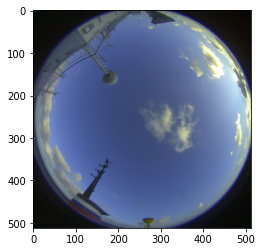

In [20]:
img = plt.imread("/content/train/img-2019-12-11T08-57-56devID1.jpg")
plt.imshow(img)
plt.show()

In [21]:
print(train.shape)
print(test.shape)
print(train.shape[0] + test.shape[0])
assert(data.shape[0] == train.shape[0] + test.shape[0])
print("OK!")

(73561, 2)
(18516, 2)
92077
OK!


In [22]:
class OceanDataset(Dataset) :
  def __init__(self, meta_data, root_dir, transforms = None):
      self.annotations = meta_data
      self.root_dir = root_dir
      self.transforms = transforms
  
  def __len__(self) :
      return len(self.annotations)
  
  def __getitem__(self, index) :
      img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
      image = io.imread(img_path)
      y_label = torch.tensor(int(self.annotations.iloc[index, 1]))
      
      if self.transforms:
          image = self.transforms(image)
        
      
      return (image, y_label)

In [23]:
aug_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.CenterCrop(512),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_transform = transforms.Compose([
    transforms.ToTensor(),
    #transforms.CenterCrop(512),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    #transforms.CenterCrop(224),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [24]:
#augmentation по экспедициям
ABP42_aug = OceanDataset(meta_data = ABP42_data_sets, root_dir = '/content/train/',
                       transforms  = aug_transform)
AI49_aug = OceanDataset(meta_data  = AI49_data_sets, root_dir = '/content/train/',
                       transforms  = aug_transform)
AI52_aug = OceanDataset(meta_data  = AI52_data_sets, root_dir = '/content/train/',
                       transforms  = aug_transform)
AMK79_aug = OceanDataset(meta_data = AMK79_data_sets, root_dir = '/content/train/',
                       transforms  = aug_transform)
ANS31_aug = OceanDataset(meta_data = ANS31_data_sets, root_dir = '/content/train/',
                       transforms  = aug_transform)

In [25]:
train_data = OceanDataset(meta_data = train, root_dir = '/content/train/',
                       transforms = train_transform)

In [97]:
train_sets = torch.utils.data.ConcatDataset((train_data, ABP42_aug))
print(len(train_sets))
print(len(ANS31_aug))
print(len(train))

102206
9140
73561


In [28]:
train_set.__len__()

102206

In [29]:
test_set = OceanDataset(meta_data = test, root_dir = '/content/train/',
                       transforms = test_transform)

In [30]:
print(len(ABP42_data_sets))
print(len(AI49_data_sets))
print(len(AI52_data_sets))
print(len(AMK79_data_sets))
print(len(ANS31_data_sets))
print(len(ABP42_data_sets) + len(AI49_data_sets) + len(AI52_data_sets) + len(AMK79_data_sets) + len(ANS31_data_sets))

assert(len(ABP42_data_sets) == ABP42_aug.__len__())
assert(len(AI49_data_sets) == AI49_aug.__len__())
assert(len(AI52_data_sets) == AI52_aug.__len__())
assert(len(AMK79_data_sets) == AMK79_aug.__len__())
assert(len(ANS31_data_sets) == ANS31_aug.__len__())
assert((len(ABP42_data_sets) 
        + len(AI49_data_sets) 
        + len(AI52_data_sets)
        + len(AMK79_data_sets)
        + len(ANS31_data_sets))
        == len(train)
)
print("ok!")

28645
135
21624
14017
9140
73561
ok!


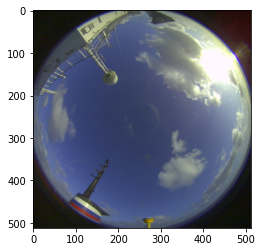

In [31]:
plt.imshow(AMK79_aug[1][0].permute(1, 2, 0))

In [65]:
train_loader = DataLoader(train_set, batch_size = 16, shuffle = True)
test_loader = DataLoader(test_set, batch_size = 16, shuffle = True)

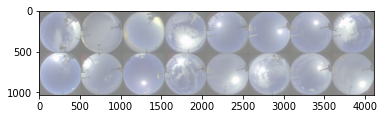

In [66]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)

images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels


##Alex_Net

In [81]:
model = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=True)
model.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [82]:
model.classifier[1] = nn.Linear(9216, 4096)
model.classifier[4] = nn.Linear(4096, 1024)
model.classifier[6] = nn.Linear(1024, 9)

In [83]:
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [84]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [85]:
print(device)

cuda:0


In [86]:
model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [87]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [88]:
for epoch in range(1):  # loop over the dataset multiple times

    running_loss = 0.0
    start_time = time.time()
    for i, data in enumerate(train_loader, 0):

        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        output = model(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        end_time = time.time()
        time_taken = end_time - start_time

        running_loss += loss.item()
        if i % 200 == 199: 
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            print('Time:',time_taken)
            running_loss = 0.0

print('Finished Training of AlexNet')


[1,   200] loss: 0.163
Time: 41.569583892822266
[1,   400] loss: 0.132
Time: 83.07354879379272
[1,   600] loss: 0.123
Time: 124.76879668235779
[1,   800] loss: 0.112
Time: 166.27641081809998
[1,  1000] loss: 0.110
Time: 208.0074384212494
[1,  1200] loss: 0.100
Time: 249.76710748672485
[1,  1400] loss: 0.100
Time: 291.7225081920624
[1,  1600] loss: 0.100
Time: 333.4615206718445
[1,  1800] loss: 0.093
Time: 375.1512701511383
[1,  2000] loss: 0.092
Time: 416.96955156326294
[1,  2200] loss: 0.086
Time: 458.72117376327515
[1,  2400] loss: 0.081
Time: 500.5049684047699
[1,  2600] loss: 0.077
Time: 542.2373838424683
[1,  2800] loss: 0.073
Time: 584.2526068687439
[1,  3000] loss: 0.067
Time: 626.1113064289093
[1,  3200] loss: 0.064
Time: 667.8504068851471
[1,  3400] loss: 0.060
Time: 709.8299934864044
[1,  3600] loss: 0.055
Time: 751.4259204864502
[1,  3800] loss: 0.055
Time: 793.2607750892639
[1,  4000] loss: 0.047
Time: 834.9383120536804
[1,  4200] loss: 0.046
Time: 876.5059065818787
[1,  44

In [89]:
correct = 0
total = 0

with torch.no_grad():
    for test_elem in test_loader:
        images, labels = test_elem[0].to(device), test_elem[1].to(device)
        predict_set = model(images)
        _, predicted = torch.max(predict_set.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(100 * correct / total)

92.10952689565781


In [102]:
correct = 0
total = 0
predict_set = None
with torch.no_grad():
    for test_elem in test_loader:
        images, labels = test_elem[0].to(device), test_elem[1].to(device)
        predict_set = model(images)
        _, predicted = torch.max(predict_set.data, 1) 

        total += labels.size(0)
        correct += (abs(labels - predicted) <= 1).sum().item()


print(100 * correct / total)

97.08360337005833


In [ ]:
correct = 0
total = 0
predict_set = None
count = 0
with torch.no_grad():
    for test_elem in test_loader:
        images, labels = test_elem[0].to(device), test_elem[1].to(device)
        predict_set = model(images)
        _, predicted = torch.max(predict_set.data, 1)
        print(torch.max(predict_set.data, 1))
        print("--------")
        print(labels)
        print("\n")
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if count == 2 :
            break
        count += 1


print(100 * correct / total)

In [125]:
class_correct = list(0. for i in range(9))
class_total = list(0. for i in range(9))

with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        c = (predicted == labels).squeeze()

        for i in range(labels.shape[0]):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(9):
    print('Accuracy of %5s : %2d %%' % (
        i, 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 95 %
Accuracy of     1 : 93 %
Accuracy of     2 : 88 %
Accuracy of     3 : 74 %
Accuracy of     4 : 90 %
Accuracy of     5 : 84 %
Accuracy of     6 : 92 %
Accuracy of     7 : 79 %
Accuracy of     8 : 99 %
